# Data Analysis on Credit Card Approval Prediction

---

**Course**: Machine Learning and Data Science for Social Good (20S856137)

**Authors**: Boqin Cai (boqin.cai@stud.sbg.ac.at)

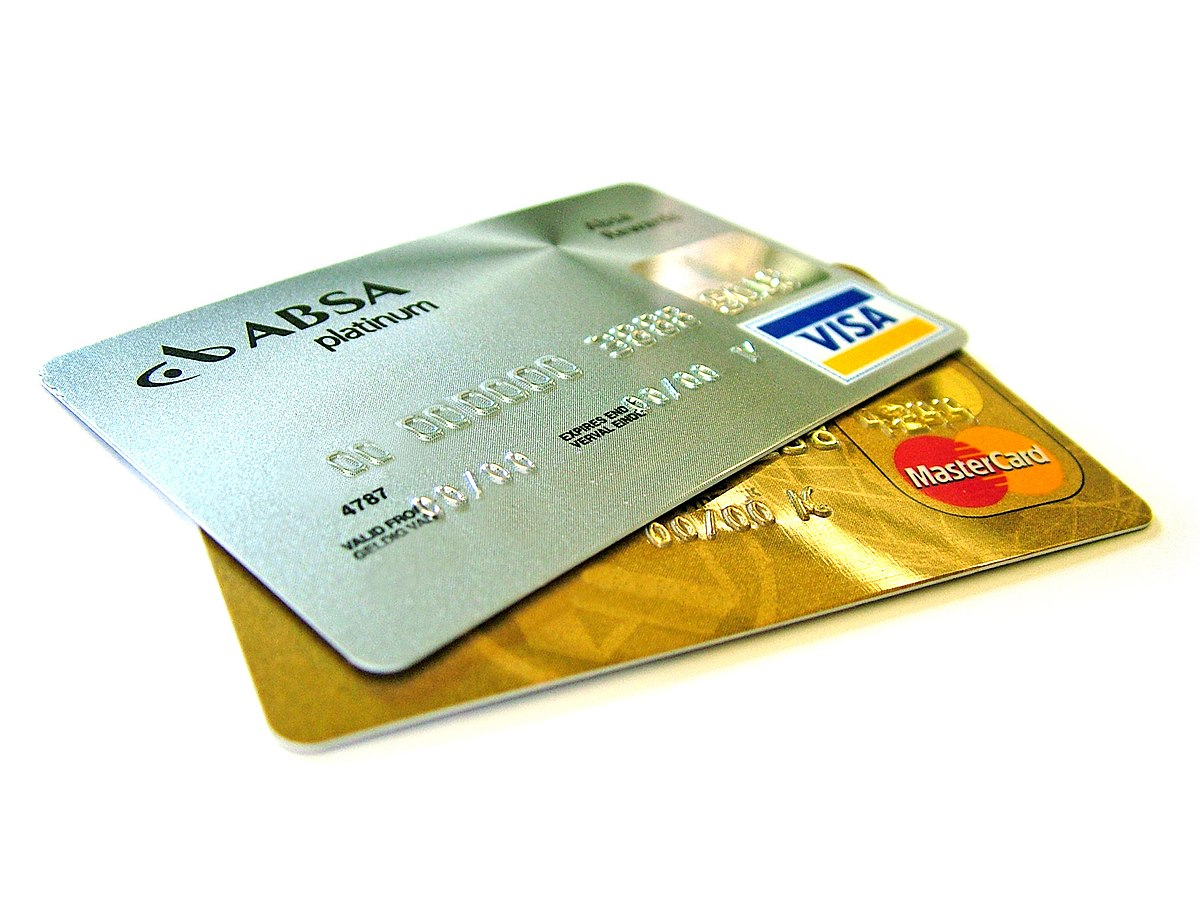

## Introduction

<br>

> Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

In this notebook, I use python to analyze the risk of credit card customers based on the historic data. I use decision tree and random forest to model. And finally I use Grid Search Cross Validation to optimize the parameters of random forest.

### Contents

* [Preparation](#Preparation)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis-(EDA))
* [Feature Engineering](#Feature-Engineering)
* [Modeling](#Modeling)

## Preparation 

### Import modules

Import some basic modules and configure the format of pictures in the notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%config InlineBackend.figure_format = 'retina'

/Users/caiboqin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read dataset

In [2]:
application_record_df = pd.read_csv('426827_1031720_bundle_archive/application_record.csv')

credit_record_df = pd.read_csv('426827_1031720_bundle_archive/credit_record.csv')

In [3]:
application_record_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

In [4]:
credit_record_df

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

## Exploratory Data Analysis (EDA)

### Check if the ID is unique

In [5]:
print(f"The shape of application_record_df {application_record_df.shape}")
print(f"The shape of credit_record_df {credit_record_df.shape}")
print(f"The number of distinct IDs of application_record_df {len(set(application_record_df['ID']))}")
print(f"The number of distinct IDs of credit_record_df {len(set(credit_record_df['ID']))}")

The shape of application_record_df (438557, 18)
The shape of credit_record_df (1048575, 3)
The number of distinct IDs of application_record_df 438510
The number of distinct IDs of credit_record_df 45985


### Check the missing values in dataset

In [6]:
print('Missing value of application_record_df')
print(application_record_df.isna().any())
print('Missing value of credit_record_df')
print(credit_record_df.isna().any())

Missing value of application_record_df
ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool
Missing value of credit_record_df
ID                False
MONTHS_BALANCE    False
STATUS            False
dtype: bool


### Find the repeated IDs

In [7]:
a=application_record_df['ID']
b=credit_record_df['ID']

import collections
a=collections.Counter(a)

for i in a:
    if a[i]>1:
        print(i)

7702516
7602432
7836971
7213374
7052783
7023651
7838075
7636389
7052812
7372589
7155150
7090931
7091721
7137299
7744386
7772847
7636756
7317997
7053557
7742853
7576316
7099881
7046068
7036518
7742298
7022197
7603224
7023108
7089090
7702238
7243768
7045885
7836711
7743418
7045794
7618285
7207977
7154598
7154819
7024111
7282535
7050948
7416167
7174719
7833087
7135270
7022327


This is a sample of repeated ID. The ID field should be unique. But for ID 7052783, there are 2 different raws in the dataset. So we can't asure which one is correct. This might bring the problem of data merging. And there about 30 repeated IDs in the dataset. So we just drop them all.

In [8]:
application_record_df[application_record_df['ID']==7052783]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
421726  7052783           M            Y               Y             0   
422660  7052783           M            Y               Y             2   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
421726          157500.0          Working               Higher education   
422660          166500.0          Working  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
421726            Married  House / apartment      -13428          -2589   
422660            Married  House / apartment      -15883          -2697   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
421726           1                0           1           0        Laborers   
422660           1                1           0           1        Managers   

        CNT_FAM_MEMBERS  
421726              2.0  
422660              4.0

In [9]:
application_record_df=application_record_df.drop_duplicates(subset='ID', keep=False)

### Define risky customers

If a customer has no loan or has paid off, he/she will be marked with 'X' or 'C'. So in this case, I convert them to -1. The strategy of defining risky customer is those who once overdue a bill over 30 days will be marked. So in the table application_record, I analyzed all records of customers and marked normal customers as 0, risky customers as 1.

In [10]:
credit_record_df[credit_record_df['STATUS']=='X']=-1
credit_record_df[credit_record_df['STATUS']=='C']=-1

credit_record_df=credit_record_df.astype(int)

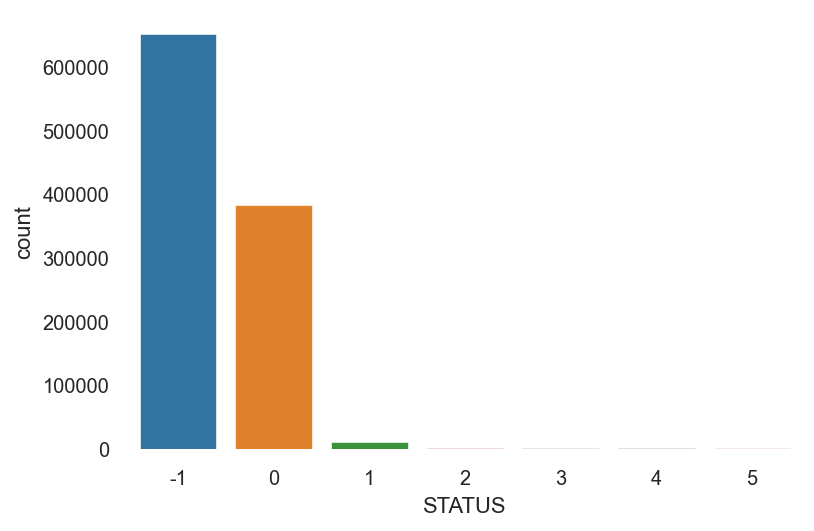

In [11]:
sns.countplot(credit_record_df.STATUS)

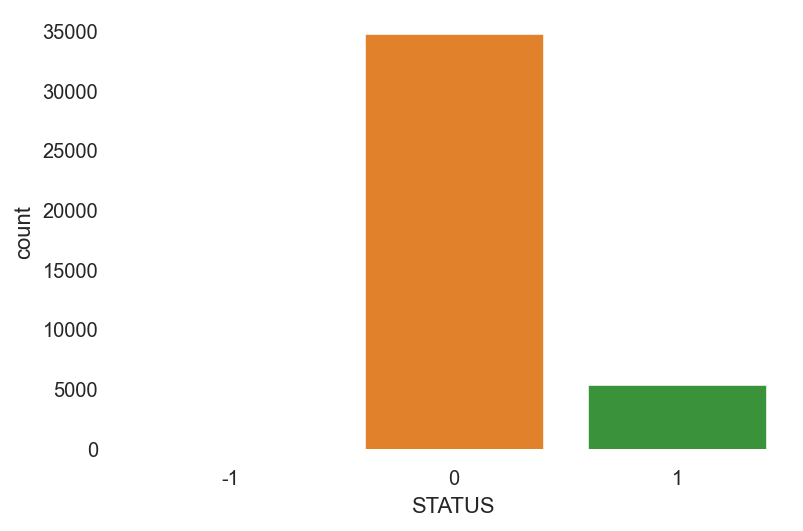

In [12]:
grouped=credit_record_df.groupby('ID').max()
grouped.loc[grouped['STATUS'] > 0, 'STATUS']=1
sns.countplot(grouped['STATUS'])

### Merge the dataset

Link the two datasets with ID. 

In [13]:
df=application_record_df.merge(grouped, how='inner', left_on='ID', right_on='ID')
df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804           M            Y               Y             0   
1      5008805           M            Y               Y             0   
2      5008806           M            Y               Y             0   
3      5008808           F            N               Y             0   
4      5008810           F            N               Y             0   
...        ...         ...          ...             ...           ...   
31997  5149828           M            Y               Y             0   
31998  5149834           F            N               Y             0   
31999  5149838           F            N               Y             0   
32000  5150049           F            N               Y             0   
32001  5150337           M            N               Y             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              427500.0               Working               Higher education   
1              427500.0               Working               Higher education   
2              112500.0               Working  Secondary / secondary special   
3              270000.0  Commercial associate  Secondary / secondary special   
4              270000.0  Commercial associate  Secondary / secondary special   
...                 ...                   ...                            ...   
31997          315000.0               Working  Secondary / secondary special   
31998          157500.0  Commercial associate               Higher education   
31999          157500.0             Pensioner               Higher education   
32000          283500.0               Working  Secondary / secondary special   
32001          112500.0               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Civil marriage   Rented apartment      -12005          -4542   
1            Civil marriage   Rented apartment      -12005          -4542   
2                   Married  House / apartment      -21474          -1134   
3      Single / not married  House / apartment      -19110          -3051   
4      Single / not married  House / apartment      -19110          -3051   
...                     ...                ...         ...            ...   
31997               Married  House / apartment      -17348          -2420   
31998               Married  House / apartment      -12387          -1325   
31999               Married  House / apartment      -12387          -1325   
32000               Married  House / apartment      -17958           -655   
32001  Single / not married   Rented apartment       -9188          -1193   

       FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0               1                1           0           0             NaN   
1               1                1           0           0             NaN   
2               1                0           0           0  Security staff   
3               1                0           1           1     Sales staff   
4               1                0           1           1     Sales staff   
...           ...              ...         ...         ...             ...   
31997           1                0           0           0        Managers   
31998           1                0           1           1  Medicine staff   
31999           1                0           1           1  Medicine staff   
32000           1                0           0           0     Sales staff   
32001           1                0           0           0        Laborers   

       CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
0                  2.0             -13       1  
1                  2.0             -12       1  
2                  2.0              -8       0  
3                  1.0               0       0  
4                  1.0             -16       0  
...               

In [14]:
report=pandas_profiling.ProfileReport(df)
report

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


## Feature Engineering

* CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY use string to represent the spacific meaning in the fields. But the machine learning library sklearn cannot recognize the labels. So for those 3 fileds, we use 0, 1 to instead.

* CNT_CHILDREN, AMT_INCOME_TOTAL, DAYS_BIRTH, DAYS_EMPLOYED and CNT_FAM_MEMBERS are continuous variables. In this case, they are all converted to categories.

* NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE are multi-labeled columns, so I use LabelEncoder to encode those labels. Meanwhile, OCCUPATION_TYPE has missing values. In this case, I use 'Other' to replace the missing values.

* The column FLAG_MOBIL only contains 1. So it is a constant that will be removed.

Output the types of the variables.

In [15]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                   int64
dtype: object

CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY use string to represent the spacific meaning in the fields. But the machine learning library sklearn cannot recognize the labels. So for those 3 fileds, we use 0, 1 to instead.

In [16]:
from sklearn.preprocessing import LabelEncoder

CODE_GENDER_le = LabelEncoder()
df['CODE_GENDER'] = CODE_GENDER_le.fit_transform(df['CODE_GENDER']) 


FLAG_OWN_CAR_le = LabelEncoder()
df['FLAG_OWN_CAR'] = FLAG_OWN_CAR_le.fit_transform(df['FLAG_OWN_CAR']) 


FLAG_OWN_REALTY_le = LabelEncoder()
df['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_le.fit_transform(df['FLAG_OWN_REALTY']) 

CNT_CHILDREN, AMT_INCOME_TOTAL, DAYS_BIRTH, DAYS_EMPLOYED and CNT_FAM_MEMBERS are continuous variables. In this case, they are all converted to categories. 

* CNT_CHILDREN
  * 0: 0 child
  * 1: 1 child
  * 2: 2 or more than 2 children
* AMT_INCOME_TOTAL
  * 0: Less than 200000
  * 1: Less than 400000 and more than 200000
  * 2: More than 400000
* DAYS_BIRTH 
  * 0: Younger than 20 years old
  * 1: 30 to 40 years old
  * 2: 40 to 50 years old
  * 3: Older to 50 years old
* DAYS_EMPLOYED
  * 0: Less than 5 years
  * 1: 5 to 10 years
  * 2: More than 10 years
* CNT_FAM_MEMBERS
  * 1: 1 member
  * 2: 2 menbers
  * 3: 3 or more than 3 members

In [17]:
df.loc[df['CNT_CHILDREN'] >= 2, 'CNT_CHILDREN']=2

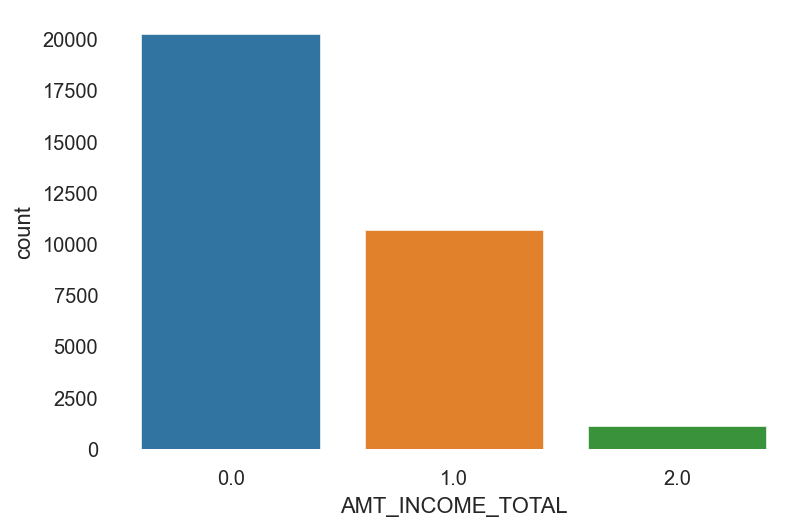

In [18]:
df.loc[df['AMT_INCOME_TOTAL'] <= 200000, 'AMT_INCOME_TOTAL']=0
df.loc[(df['AMT_INCOME_TOTAL'] <=400000) & (df['AMT_INCOME_TOTAL'] > 200000), 'AMT_INCOME_TOTAL']=1
df.loc[df['AMT_INCOME_TOTAL'] >= 400000, 'AMT_INCOME_TOTAL']=2

sns.countplot(df['AMT_INCOME_TOTAL'])

In [19]:
df.loc[-df['DAYS_BIRTH'] <= 30*365, 'DAYS_BIRTH']=0
df.loc[(-df['DAYS_BIRTH'] > 30*365) & (-df['DAYS_BIRTH'] <= 40*365), 'DAYS_BIRTH']=1
df.loc[(-df['DAYS_BIRTH'] > 40*365) & (-df['DAYS_BIRTH'] <= 50*365), 'DAYS_BIRTH']=2
df.loc[(-df['DAYS_BIRTH'] > 50*365), 'DAYS_BIRTH']=3

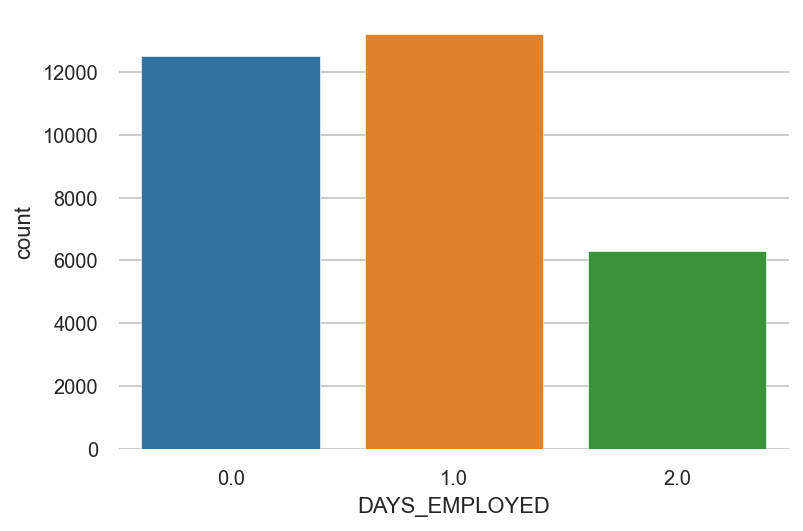

In [20]:
df.loc[df['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED']=df[df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'].mean()

df.DAYS_EMPLOYED.hist()

df.loc[-df['DAYS_EMPLOYED'] <= 5*365, 'DAYS_EMPLOYED']=0
df.loc[(-df['DAYS_EMPLOYED'] > 5*365) & (-df['DAYS_EMPLOYED'] <= 10*365), 'DAYS_EMPLOYED']=1
df.loc[-df['DAYS_EMPLOYED'] > 10*365, 'DAYS_EMPLOYED']=2

sns.countplot(df['DAYS_EMPLOYED'])

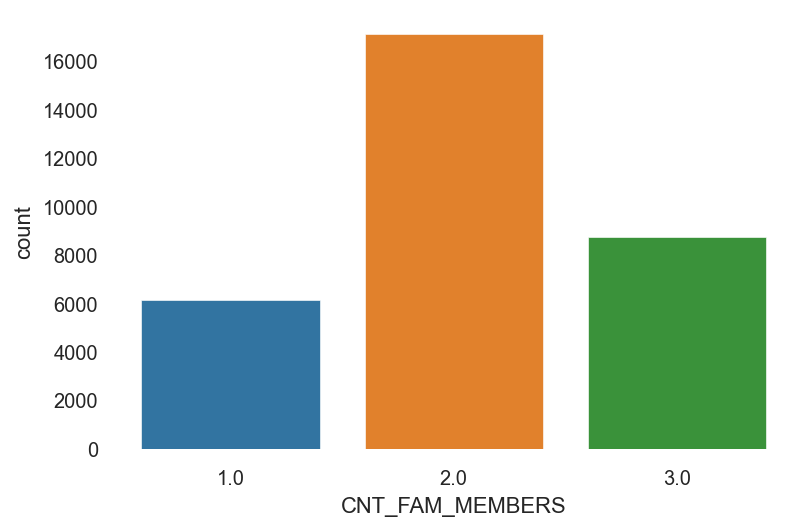

In [21]:
df.loc[df['CNT_FAM_MEMBERS'] >= 3, 'CNT_FAM_MEMBERS'] = 3
sns.countplot(df['CNT_FAM_MEMBERS'])

NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE are multi-labeled columns, so I use LabelEncoder to encode those labels. Meanwhile, OCCUPATION_TYPE has missing values. In this case, I use 'Other' to replace the missing values.

In [22]:
NAME_INCOME_TYPE_le = LabelEncoder()
df['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_le.fit_transform(df['NAME_INCOME_TYPE']) 

NAME_EDUCATION_TYPE_le = LabelEncoder()
df['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_le.fit_transform(df['NAME_EDUCATION_TYPE']) 

NAME_FAMILY_STATUS_le = LabelEncoder()
df['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_le.fit_transform(df['NAME_FAMILY_STATUS']) 

NAME_HOUSING_TYPE_le = LabelEncoder()
df['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_le.fit_transform(df['NAME_HOUSING_TYPE']) 


df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Other')
OCCUPATION_TYPE_le = LabelEncoder()
df['OCCUPATION_TYPE'] = OCCUPATION_TYPE_le.fit_transform(df['OCCUPATION_TYPE']) 

The column FLAG_MOBIL only contains 1. So it is a constant that will be removed.

In [23]:
df=df.drop(labels=['FLAG_MOBIL', 'MONTHS_BALANCE'],axis=1)

In [24]:
df

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804            1             1                1             0   
1      5008805            1             1                1             0   
2      5008806            1             1                1             0   
3      5008808            0             0                1             0   
4      5008810            0             0                1             0   
...        ...          ...           ...              ...           ...   
31997  5149828            1             1                1             0   
31998  5149834            0             0                1             0   
31999  5149838            0             0                1             0   
32000  5150049            0             0                1             0   
32001  5150337            1             0                1             0   

       AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0                   2.0                 4                    1   
1                   2.0                 4                    1   
2                   0.0                 4                    4   
3                   1.0                 0                    4   
4                   1.0                 0                    4   
...                 ...               ...                  ...   
31997               1.0                 4                    4   
31998               0.0                 0                    1   
31999               0.0                 1                    1   
32000               1.0                 4                    4   
32001               0.0                 4                    4   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                       0                  4           1            2.0   
1                       0                  4           1            2.0   
2                       1                  1           3            0.0   
3                       3                  1           3            1.0   
4                       3                  1           3            1.0   
...                   ...                ...         ...            ...   
31997                   1                  1           2            1.0   
31998                   1                  1           1            0.0   
31999                   1                  1           1            0.0   
32000                   1                  1           2            0.0   
32001                   3                  4           0            0.0   

       FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0                    1           0           0               12   
1                    1           0           0               12   
2                    0           0           0               17   
3                    0           1           1               15   
4                    0           1           1               15   
...                ...         ...         ...              ...   
31997                0           0           0               10   
31998                0           1           1               11   
31999                0           1           1               11   
32000                0           0           0               15   
32001                0           0           0                8   

       CNT_FAM_MEMBERS  STATUS  
0                  2.0       1  
1                  2.0       1  
2                  2.0       0  
3                  1.0       0  
4                  1.0       0  
...                ...     ...  
31997              2.0       1  
31998              2.0       1  
31999              2.0       1  
32000              2.0       1  
32001              1.0       1  

[32002 rows x 18 columns]

## Modeling

### Split dataset
Usually, we need to split dataset into 2 parts for model testing. Empirically, 70% of data are used for training dataset, 30% of data are use for testing. The status is the dependent variable. And there are 16 independent variables.

In [25]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,1:-1]
y=df['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)

### Methods

* Decision tree
* Random forest

Accuracy of training dataset:  0.8660327663943574
Accuracy of test dataset:  0.8651182168524112
Confusion matrix of training dataset: 
 [[19383    14]
 [ 2987    17]]
Confusion matrix of test dataset: 
 [[8304   10]
 [1285    2]]


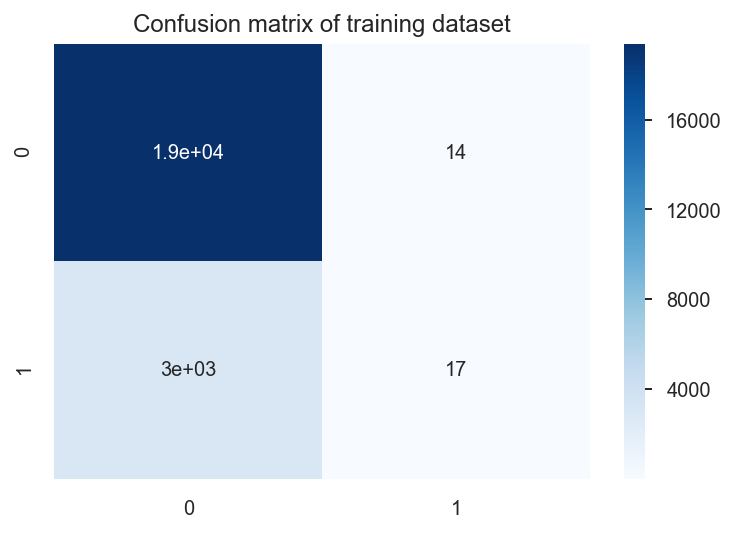

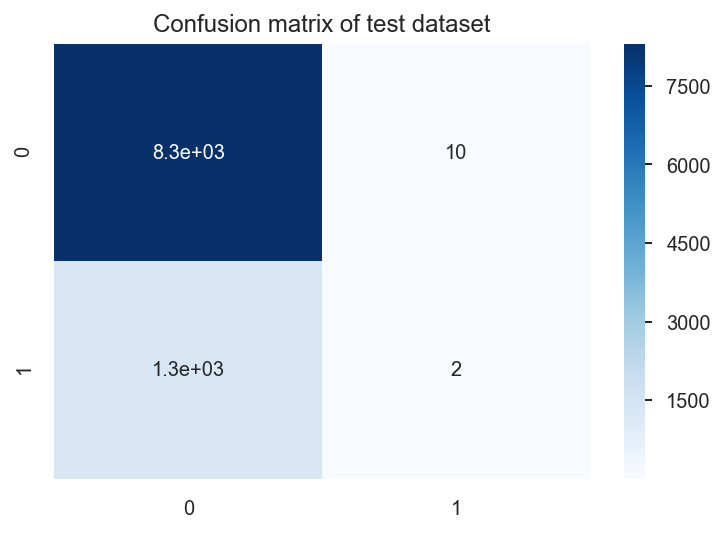

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

model=DecisionTreeClassifier(max_depth=20, min_samples_leaf=30)

model.fit(X_train,y_train)
y_predict_train=model.predict(X_train)
y_predict=model.predict(X_test)

print('Accuracy of training dataset: ', accuracy_score(y_train, y_predict_train))
print('Accuracy of test dataset: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of training dataset: \n', confusion_matrix(y_train,y_predict_train))
print('Confusion matrix of test dataset: \n', confusion_matrix(y_test,y_predict))

ax=sns.heatmap(confusion_matrix(y_train,y_predict_train),cmap=plt.cm.Blues,annot=True)
ax.set_title('Confusion matrix of training dataset')
plt.show()
ax=sns.heatmap(confusion_matrix(y_test,y_predict),cmap=plt.cm.Blues,annot=True)
ax.set_title('Confusion matrix of test dataset')
plt.show()

If we draw the decision tree, we can find something goes strange. OCCUPATION_TYPE indicates the different types of jobs. The original data is in categories. But the machine learning models in sklearn only support **number** as input. So we encoded it. But the number here has no spacific mieaning. It's not comparable. But the decision tree model regard it as a number and split the node with the range of number. 

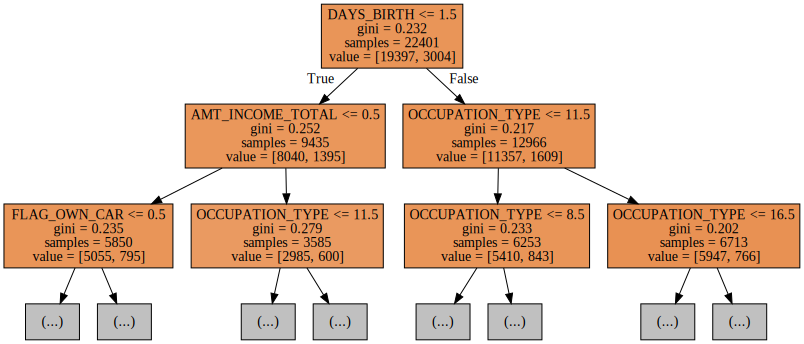

In [27]:
from sklearn import tree
import graphviz

dot_tree=tree.export_graphviz(model, feature_names = X_train.columns, max_depth=2, filled=True)  
graph = graphviz.Source(dot_tree)  
graph 

To solve this problem, I use **one-hot** encoding to re-encode the whole dataset. One-hot encoding can separate the labels in a column into columns with only 0 and 1.

In [28]:
dummy_columns=['CNT_CHILDREN', 'AMT_INCOME_TOTAL','NAME_INCOME_TYPE',
               'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
               'DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS']

dummy_X=pd.get_dummies(X, columns=dummy_columns)
dummy_X

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  FLAG_WORK_PHONE  \
0                1             1                1                1   
1                1             1                1                1   
2                1             1                1                0   
3                0             0                1                0   
4                0             0                1                0   
...            ...           ...              ...              ...   
31997            1             1                1                0   
31998            0             0                1                0   
31999            0             0                1                0   
32000            0             0                1                0   
32001            1             0                1                0   

       FLAG_PHONE  FLAG_EMAIL  CNT_CHILDREN_0  CNT_CHILDREN_1  CNT_CHILDREN_2  \
0               0           0               1               0               0   
1               0           0               1               0               0   
2               0           0               1               0               0   
3               1           1               1               0               0   
4               1           1               1               0               0   
...           ...         ...             ...             ...             ...   
31997           0           0               1               0               0   
31998           1           1               1               0               0   
31999           1           1               1               0               0   
32000           0           0               1               0               0   
32001           0           0               1               0               0   

       AMT_INCOME_TOTAL_0.0  ...  OCCUPATION_TYPE_12  OCCUPATION_TYPE_13  \
0                         0  ...                   1                   0   
1                         0  ...                   1                   0   
2                         1  ...                   0                   0   
3                         0  ...                   0                   0   
4                         0  ...                   0                   0   
...                     ...  ...                 ...                 ...   
31997                     0  ...                   0                   0   
31998                     1  ...                   0                   0   
31999                     1  ...                   0                   0   
32000                     0  ...                   0                   0   
32001                     1  ...                   0                   0   

       OCCUPATION_TYPE_14  OCCUPATION_TYPE_15  OCCUPATION_TYPE_16  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   1                   0   
4                       0                   1                   0   
...                   ...                 ...                 ...   
31997                   0                   0                   0   
31998                   0                   0                   0   
31999                   0                   0                   0   
32000                   0                   1                   0   
32001                   0                   0                   0   

       OCCUPATION_TYPE_17  OCCUPATION_TYPE_18  CNT_FAM_MEMBERS_1.0  \
0                       0                   0                    0   
1                       0                   0                    0   
2                       1                   0                    0   
3                       0                   0                    1   
4                       0                   0                    1   
...                   ...      

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dummy_X, y, stratify=y, test_size=0.3, random_state=100)

Accuracy of training dataset:  0.866211329851346
Accuracy of test dataset:  0.8649099052182064
Confusion matrix of training dataset: 
 [[19381    16]
 [ 2981    23]]
Confusion matrix of test dataset: 
 [[8296   18]
 [1279    8]]


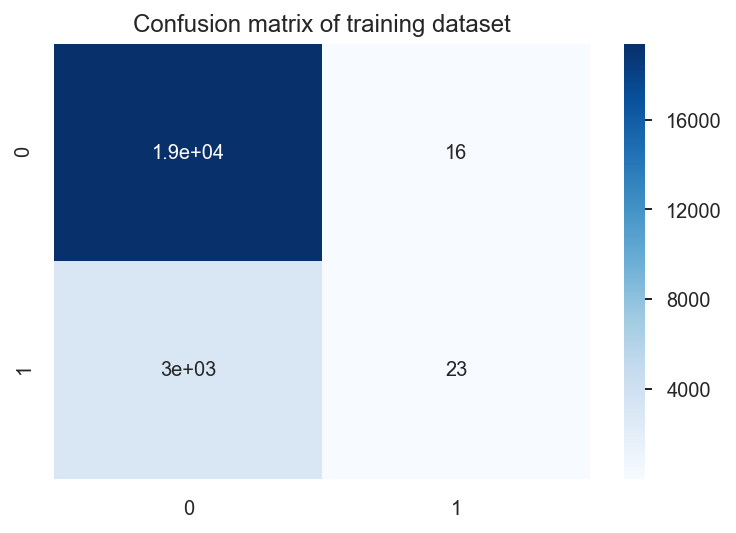

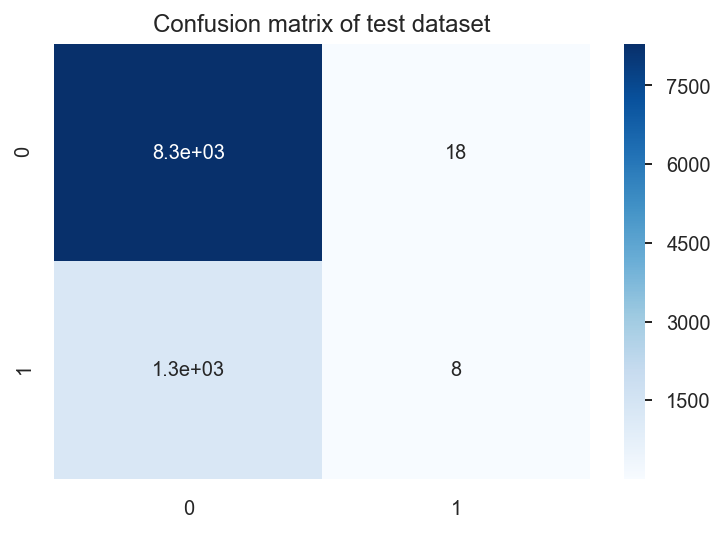

In [30]:
model=DecisionTreeClassifier(max_depth=20, min_samples_leaf=30)

model.fit(X_train,y_train)
y_predict_train=model.predict(X_train)
y_predict=model.predict(X_test)

print('Accuracy of training dataset: ', accuracy_score(y_train, y_predict_train))
print('Accuracy of test dataset: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of training dataset: \n', confusion_matrix(y_train,y_predict_train))
print('Confusion matrix of test dataset: \n', confusion_matrix(y_test,y_predict))

ax=sns.heatmap(confusion_matrix(y_train,y_predict_train),cmap=plt.cm.Blues,annot=True)
ax.set_title('Confusion matrix of training dataset')
plt.show()
ax=sns.heatmap(confusion_matrix(y_test,y_predict),cmap=plt.cm.Blues,annot=True)
ax.set_title('Confusion matrix of test dataset')
plt.show()

The structure of the decision tree

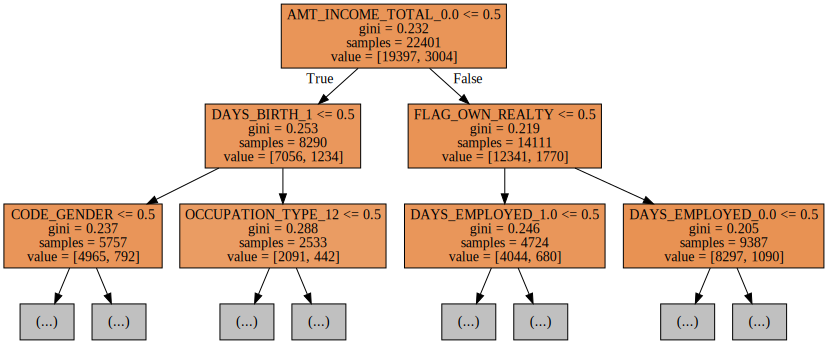

In [31]:
from sklearn import tree
import graphviz

dot_tree=tree.export_graphviz(model,feature_names = dummy_X.columns,  max_depth=2,
                      filled=True)  
graph = graphviz.Source(dot_tree)  
graph 

But, still, we have another problem. The dataset is imbalanced. There are only 27711 marked 0 and 4291 marked 1. So, we need to balance the dataset to enhance the model's generalization. Here I used the Synthetic Minority Over-sampling TEchnique (SMOTE) to oversample to minority.

In [32]:
from imblearn.over_sampling import SMOTE

print('Before oversampling: \n', y.groupby(y).count())

X_balance,y_balance = SMOTE().fit_sample(dummy_X,y)
X_train, X_test, y_train, y_test = train_test_split(X_balance, y_balance, stratify=y_balance, test_size=0.3, random_state=100)

print('After oversampling: \n', y_balance.groupby(y_balance).count())

Before oversampling: 
 STATUS
0    27711
1     4291
Name: STATUS, dtype: int64
After oversampling: 
 STATUS
0    27711
1    27711
Name: STATUS, dtype: int64


Now I use the **Random Forest** to model the data. A single decision tree is a weak classifier. It's easy to overfit or underfit the data. So random forest can solve this problem by using bagging strategy.

Accuracy of training dataset:  0.8581518236886196
Accuracy of test dataset:  0.8373729476153244
Confusion matrix of training dataset: 
 [[16903  2494]
 [ 3009 16389]]
Confusion matrix of test dataset: 
 [[7076 1238]
 [1466 6847]]


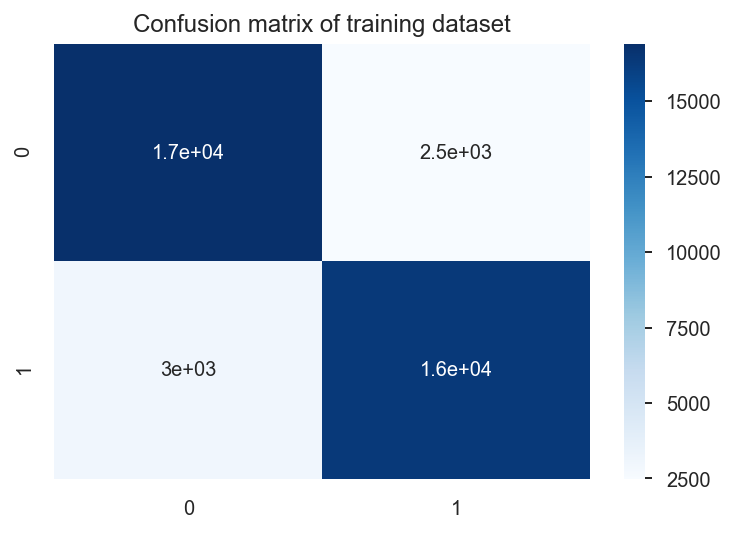

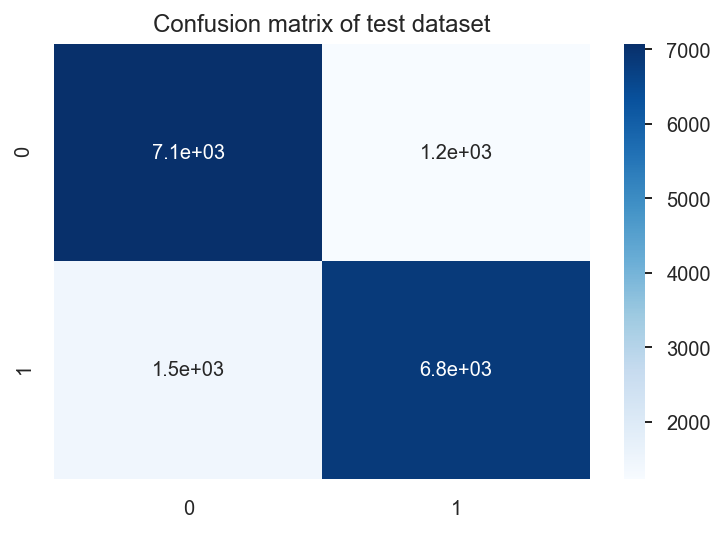

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_leaf=5)

model.fit(X_train,y_train)
y_predict_train=model.predict(X_train)
y_predict=model.predict(X_test)

print('Accuracy of training dataset: ', accuracy_score(y_train, y_predict_train))
print('Accuracy of test dataset: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of training dataset: \n', confusion_matrix(y_train,y_predict_train))
print('Confusion matrix of test dataset: \n', confusion_matrix(y_test,y_predict))

ax=sns.heatmap(confusion_matrix(y_train,y_predict_train),cmap=plt.cm.Blues,annot=True)
ax.set_title('Confusion matrix of training dataset')
plt.show()
ax=sns.heatmap(confusion_matrix(y_test,y_predict),cmap=plt.cm.Blues,annot=True)
ax.set_title('Confusion matrix of test dataset')
plt.show()

### Parameter optimization

Empirical parameters might not be the best choice for a model. So I used grid search cross validation to find the best combination of parameters. Here I chose 3 parameters for optimization, n_estimators, min_samples_leaf and max_depth. They will be test in a range one by one and return a model with the highest accuracy.

In [98]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,101,10), 'min_samples_leaf':range(2,20,2), 'max_depth':range(10,100,5)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(max_features='sqrt',
                                                           random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',iid=False,cv=5,n_jobs=4)
gsearch1.fit(X_train,y_train)


/Users/caiboqin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              random_state=10),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(10, 100, 5),
                         'min_samples_leaf': range(2, 20, 2),
                         'n_estimators': range(20, 101, 10)},
             scoring='roc_auc')

In [99]:
gsearch1.best_estimator_ , gsearch1.best_params_, gsearch1.best_score_

(RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                        random_state=10),
 {'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 100},
 0.9210556113675807)

In [100]:
y_predict_train=gsearch1.predict(X_train)
y_predict=gsearch1.predict(X_test)

print('Accuracy of training dataset: ', accuracy_score(y_train, y_predict_train))
print('Accuracy of test dataset: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of training dataset: \n', confusion_matrix(y_train,y_predict_train))
print('Confusion matrix of test dataset: \n', confusion_matrix(y_test,y_predict))

Accuracy of training dataset:  0.8812991364866607
Accuracy of test dataset:  0.8574607566007096
Confusion matrix of training dataset: 
 [[17144  2253]
 [ 2352 17046]]
Confusion matrix of test dataset: 
 [[7148 1166]
 [1204 7109]]


## Summary

Basically, I used Python + Jupyter notebook to finish all the data analysis. Final report will be presented as a notebook.

After data exploration, I found some problems in the dataset.
* Repeated ID
* Missing value
* Some variables are in text categories 

So, I use pandas to clean the data. And I re-encode the whole dataset. All the fields after data cleaning are categorical variable, which is not linear. So I chose non-linear machine learning methods to solve the problem, decision tree and random forest.

The simple decision tree can’t fit data well because the original data set is extremely imbalanced. So I used Synthetic Minority Over-sampling TEchnique (SMOTE) to oversample the dataset. Also, I used random forest based on bagging strategy to avoid overfitting or underfitting. 

Usually, empirical parameters might not be the best choice for a model. So I used grid search cross validation to find the best combination of parameters. Here I chose 3 parameters for optimization, which are n_estimators, min_samples_leaf and max_depth. They will be tested in a range one by one and return a model with the highest accuracy.

Finally, the result of accuracy of random forest on training dataset reaches 0.88, and the test dataset also reaches 0.85, which is better than the decision tree.

# 😜 Thanks for listening

**Course**: Machine Learning and Data Science for Social Good (20S856137)

**Authors**: Boqin Cai (boqin.cai@stud.sbg.ac.at)